<a href="https://colab.research.google.com/github/ShubhamPaliwal03/Botnet-Detection-Using-ML/blob/main/botnet_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from google.colab import files

# Load both files
attack = pd.read_csv("/CTU13_Attack_Traffic.csv")
normal = pd.read_csv("/CTU13_Normal_Traffic.csv")

# Add labels
attack['Label'] = 1  # Botnet
normal['Label'] = 0  # Normal

# Combine
df = pd.concat([attack, normal], ignore_index=True)

# Shuffle
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check
print(df.head())

# Save the combined dataset
df.to_csv('CTU13_Combined_Traffic.csv', index=False)

print("Combined Dataset Created!")

files.download('CTU13_Combined_Traffic.csv')

print("Combined Dataset Saved!")

   Unnamed: 0  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       31128          30670             0             2                0   
1       33686          25894             0             2                0   
2       49310          28525             0             2                0   
3       30424          29598             0             2                0   
4       28639          22644             0             2                0   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0              241                0                0               0.0   
1              176                0                0               0.0   
2              247                0                0               0.0   
3              114                0                0               0.0   
4              155                0                0               0.0   

   Fwd Pkt Len Std  ...  Fwd Act Data Pkts  Active Mean  Active Std  \
0              0.0  .

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Combined Dataset Saved!


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Label', axis=1)  # Features
y = df['Label']              # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.998319145475248
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10719
           1       1.00      1.00      1.00      7724

    accuracy                           1.00     18443
   macro avg       1.00      1.00      1.00     18443
weighted avg       1.00      1.00      1.00     18443



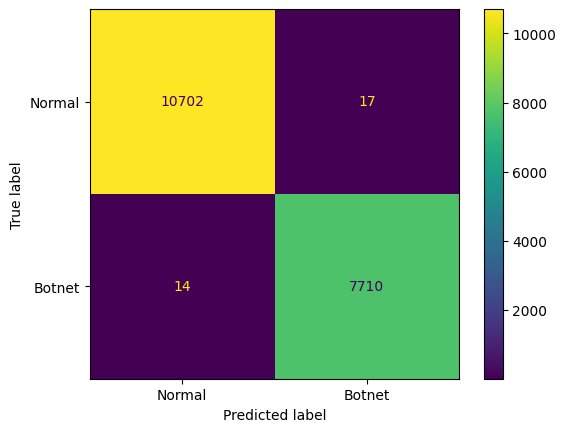

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Botnet'])
disp.plot()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import pandas as pd

# Load the combined dataset
full_dataset = pd.read_csv('/CTU13_Combined_Traffic.csv')

X = full_dataset.drop(columns=['Label'])
y = full_dataset['Label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Print table
result_table = pd.DataFrame(results)
print(result_table)


                 Model  Accuracy  Precision    Recall  F1-Score
0              XGBoost  0.998771   0.997927  0.999135  0.998531
1                  SVM  0.965768   0.967256  0.950277  0.958691
2  Logistic Regression  0.921523   0.918471  0.891387  0.904726
3                  KNN  0.994252   0.994022  0.992217  0.993119
